In [1]:
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv  
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, ToolMessage, SystemMessage
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langchain.chat_models import init_chat_model

In [3]:
todo_list = []

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [4]:
@tool
def add_task(task: str) -> str:
    """Add a task to the to-do list."""
    todo_list.append(task)
    return f"Task '{task}' added! Current tasks: {todo_list}"

In [5]:
tools = [add_task]

model = init_chat_model("ollama:llama3.2").bind_tools(tools)

In [6]:
def todo_agent(state: AgentState) -> AgentState:
    user_input = input("What task would you like to add to your to-do list? ")
    result = add_task(user_input)
    print(result)
    # Optionally, add the message to the state
    state["messages"] = state.get("messages", []) + [HumanMessage(content=user_input), SystemMessage(content=result)]
    return state

In [7]:
graph = StateGraph(AgentState)
graph.add_node("todo_agent", todo_agent)
graph.set_entry_point("todo_agent")
graph.add_edge("todo_agent", END)

# 5. Compile and run
app = graph.compile()

# 6. Run the agent (will prompt for input)
state = {"messages": []}
app.invoke(state)

Task 'Get Vegetables' added! Current tasks: ['Get Vegetables']


/tmp/ipykernel_205911/4177594030.py:3: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = add_task(user_input)


{'messages': [HumanMessage(content='Get Vegetables', additional_kwargs={}, response_metadata={}, id='c15cd986-24f8-450c-b43c-d10c569f08a2'),
  SystemMessage(content="Task 'Get Vegetables' added! Current tasks: ['Get Vegetables']", additional_kwargs={}, response_metadata={}, id='eb383e32-eb53-45bb-aab9-348f0d413925')]}

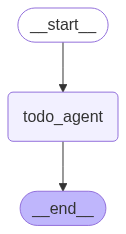

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))